# Data Preparation 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()
# What you can see here, there is some inconsitency 
# in the way of naming columns
# -> sometimes the columns have underscores, sometimes not, 
#      sometimes the columns have capital letters, sometimes not
# 
# df['Transmission Type']     is working 
# df.Transmission Type        is not working because of space

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Cleaning
To make the columns more consistent we might decide to make them all lowercased and we might replace spaces with underscores. The following code snippets show how to get this

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Actually we have the same problems with the values. Before we can apply that, we need to detect all string columns, because the str function works only on strings.

In [6]:
# dtypes returns for all the columns what is the type of this 
# column and here we're interested in "objects"
#
# In case of csv files "objects" cannot be something 
# different than strings
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
df.dtypes == 'object'
 
# to select only the objects
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

The output of the last line of code in the last snippet are the values and the index of the series. We’re not interested in values here, but we’re interested in the names.

In [8]:
# Get access to the index of that series 
# Converting it to a python list with name strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
df['make'].str.lower().str.replace(' ','_')
 
# Better way
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
 
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis (EDA) 
Exploratory data analysis (EDA) is an essential step in the data analysis process. It involves summarizing and visualizing the main characteristics of a dataset to gain insights and identify patterns or trends. By exploring the data, researchers can uncover hidden relationships between variables and make informed decisions.

One common technique in EDA is to calculate summary statistics like mean, median, and standard deviation to understand the distribution of the data. These statistics provide a general overview of the dataset and can help identify potential outliers or unusual patterns.

Visualizations also play a crucial role in EDA. Graphical representations such as histograms, scatter plots, and box plots help visualize the data distribution, identify clusters or groups, and detect any unusual patterns or trends. Visualizations can be particularly helpful in identifying relationships between variables or finding patterns that may not be immediately apparent.

Another important aspect of EDA is data cleaning. This involves handling missing values, outliers, and inconsistencies in the dataset. By carefully examining the data, researchers can decide how to handle missing values (e.g., imputing or removing them) and identify and address outliers or errors.

EDA is not a one-time process but rather an iterative one. As researchers delve deeper into the data, they may uncover additional questions or areas of interest that require further exploration. Through this iterative process, researchers refine their understanding of the data and uncover valuable insights.

In conclusion, exploratory data analysis is a crucial step in the data analysis process. By summarizing, visualizing, and cleaning the data, researchers can uncover patterns, identify relationships, and make informed decisions. It provides the foundation for more advanced data analysis techniques and helps in the formation of hypotheses for further investigation.

## Getting an overview
First we want to understand how the data looks like just to get a feeling what values are there. That helps to learn more about the problem. What you can do is to look at each column and print some values.

In [10]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [11]:
for col in df.columns:
    print(col)
    # print only the first 5 values
    print(df[col].unique()[:5])
    # print(df[col].unique())
    print("number of unique values: ",df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
number of unique values:  48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
number of unique values:  914

year
[2011 2012 2013 1992 1993]
number of unique values:  28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
number of unique values:  10

engine_hp
[335. 300. 230. 320. 172.]
number of unique values:  356

engine_cylinders
[ 6.  4.  5.  8. 12.]
number of unique values:  9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
number of unique values:  5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
number of unique values:  4

number_of_doors
[ 2.  4.  3. nan]
number of unique values:  3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
number of unique values:  71

## Distribution of price
Next we want to look at the price and visualize this column.

<Axes: xlabel='msrp', ylabel='Count'>

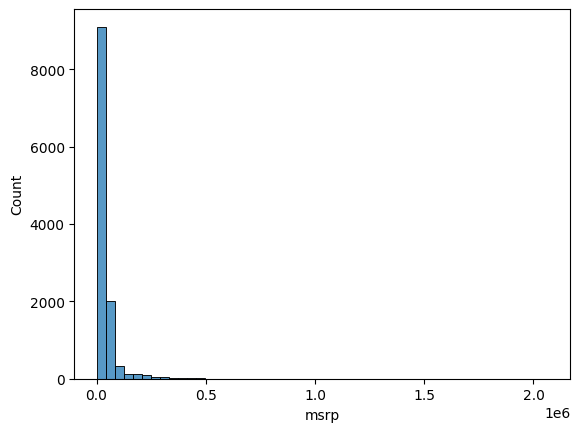

In [12]:
# For plotting we use two libraries
 
import matplotlib.pyplot as plt
import seaborn as sns
 
# this line is needed to display the plots in notebooks
%matplotlib inline
 
# bins = number of bars in the histogram
# in the diagram 1e6 means 10^6 = 1,000,000
sns.histplot(df.msrp, bins=50)

What you can see in the histogram, there are a lot of prices that are pretty cheap but only a few cars that are very expensive. That means this is a long-tail distribution (many prices in a small range, but a few prices in a wide range). We need to zoom in a bit to “ignore” the long tail with too less datapoints.

<Axes: xlabel='msrp', ylabel='Count'>

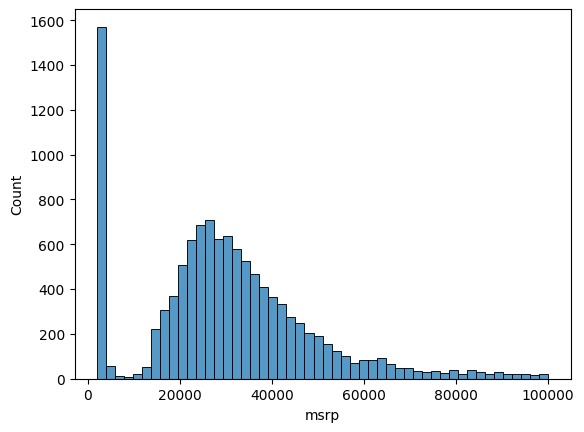

In [13]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

This kind of distribution (long tail, and the peak) is not good for ML models, because this distribution will confuse them.There is a way to get rid of the long tail, by applying logarithm to the price. This results in more compact values.

In [14]:
np.log([0, 1,10,1000,100000])

/tmp/ipykernel_2147/911933570.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1,10,1000,100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [15]:
# problem with logarithm is when we have a 0, because log(0) does not exist
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
# to not always add 1 there is a NumPy function
np.log1p([0, 1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

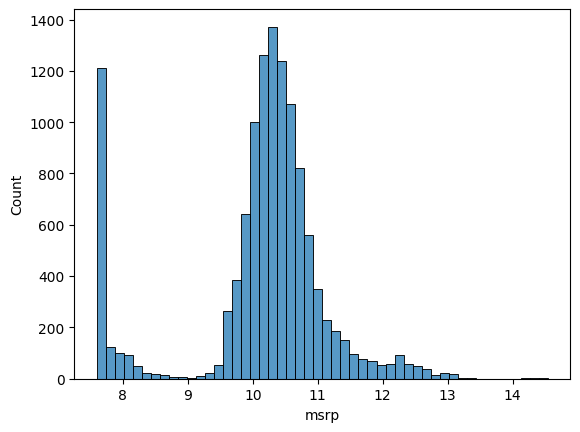

In [17]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

You can see the long tail is gone and you see a nice bell curve shape of a so called normal distribution, what is ideal for ML models. But still there is the strange peak. This could be the minimum price of $1,000 of the platform.

## Missing values
As the title suggests, this is about finding missing values (NaN values). We can use the function in the following snippet to find that values. The sum function sums across columns and shows for each column how much missing values are there. This information is important when training a model.

In [18]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework
To validate the model, we take the dataset and split it into three parts (train-val-test / 60-20-20). The reason why this is useful was mentioned in an earlier blog post. This means that we train the model on the training dataset, check if it works fine on the validation dataset, and leave the test dataset for the end. We only use the test dataset very occasionally, and only to check if the model is performing well. For each of these three parts, we create the feature matrix X and the target variable y (Xtrain, ytrain, Xval, yval, Xtest, ytest). So, what we need to do is calculate how much 20% is.

In [19]:
len(df)

11914

In [20]:
int(len(df) * 0.2)

2382

In [21]:
n = len(df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n , n_val+n_test+n_train

(11914, 11914)

In [22]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [23]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

You might think that this concludes the division, but there is one crucial problem. This approach brings us to the problem that it’s sequential. That’s a problem when there is an order in the dataset. That means we need to shuffle, otherwise, there are BMWs only in one dataset. Generally shuffling is always a good idea.

In [24]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [25]:
# to make it reproducible
#np.random.seed(2)
np.random.shuffle(idx)
idx

array([2094, 6666, 7499, ..., 3245, 9756, 5330], shape=(11914,))

In [26]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [27]:
# Create shuffled datasets with correct size
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2094,mercedes-benz,c-class,2017,premium_unleaded_(required),241.0,4.0,automatic,rear_wheel_drive,2.0,luxury,midsize,convertible,31,23,617,50900
6666,chevrolet,malibu_maxx,2006,regular_unleaded,201.0,6.0,automatic,front_wheel_drive,4.0,hatchback,midsize,4dr_hatchback,28,20,1385,19565
7499,honda,passport,2001,regular_unleaded,205.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,19,15,2202,27300
6927,tesla,model_s,2015,electric,NaN,0.0,direct_drive,all_wheel_drive,4.0,"exotic,high-performance",large,sedan,106,95,1391,85000
8212,dodge,ram_van,2000,regular_unleaded,225.0,8.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,17,12,1851,2320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,mercedes-benz,gla-class,2016,premium_unleaded_(required),375.0,4.0,automated_manual,all_wheel_drive,4.0,"crossover,factory_tuner,luxury,high-performance",compact,4dr_suv,29,22,617,49580
6046,volkswagen,jetta_hybrid,2013,premium_unleaded_(required),170.0,4.0,automated_manual,front_wheel_drive,4.0,hybrid,midsize,sedan,48,42,873,29325
10444,nissan,titan,2014,regular_unleaded,317.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,17,12,2009,36840
1442,nissan,armada,2015,regular_unleaded,317.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,19,13,2009,49880


In [28]:
# Now there is no order in the index column so we can reset index and drop the old index column.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,mercedes-benz,c-class,2017,premium_unleaded_(required),241.0,4.0,automatic,rear_wheel_drive,2.0,luxury,midsize,convertible,31,23,617,50900
1,chevrolet,malibu_maxx,2006,regular_unleaded,201.0,6.0,automatic,front_wheel_drive,4.0,hatchback,midsize,4dr_hatchback,28,20,1385,19565
2,honda,passport,2001,regular_unleaded,205.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,19,15,2202,27300
3,tesla,model_s,2015,electric,NaN,0.0,direct_drive,all_wheel_drive,4.0,"exotic,high-performance",large,sedan,106,95,1391,85000
4,dodge,ram_van,2000,regular_unleaded,225.0,8.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,17,12,1851,2320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mercedes-benz,gla-class,2016,premium_unleaded_(required),375.0,4.0,automated_manual,all_wheel_drive,4.0,"crossover,factory_tuner,luxury,high-performance",compact,4dr_suv,29,22,617,49580
7146,volkswagen,jetta_hybrid,2013,premium_unleaded_(required),170.0,4.0,automated_manual,front_wheel_drive,4.0,hybrid,midsize,sedan,48,42,873,29325
7147,nissan,titan,2014,regular_unleaded,317.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,17,12,2009,36840
7148,nissan,armada,2015,regular_unleaded,317.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,19,13,2009,49880


In [30]:
# As I mentioned, we should apply the log1p transformation to the price column to help the model perform well.
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [31]:
# There is one final but very important step. We should remove msrp values from dataframes (df_train, df_val, df_test) to make sure that we don’t accidentally use it for training purposes.
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear regression

In [32]:
df_train.iloc[10]

make                              chevrolet
model                silverado_1500_classic
year                                   2007
engine_fuel_type           regular_unleaded
engine_hp                             195.0
engine_cylinders                        6.0
transmission_type                    manual
driven_wheels              four_wheel_drive
number_of_doors                         2.0
market_category                   flex_fuel
vehicle_size                          large
vehicle_style            regular_cab_pickup
highway_mpg                              19
city_mpg                                 14
popularity                             1385
Name: 10, dtype: object

In [34]:
# We take as an example the characteristic enging_hp, city_mpg, and popularity.
def linear_regression(xi):
    n = len(xi)    
    pred = w0
     
    for j in range(n):
        pred = pred + w[j] * xi[j]
     
    return pred
 
# sample values for w0 and w and the given xi
xi = [138, 24, 1385]
w0 = 0
w = [1, 1, 1]
 
linear_regression(xi)

1547

In [35]:
# try some other values
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.280000000000001

In [36]:
# Get the real prediction for the price in $
# We do "-1" here to undo the "+1" inside the log
np.exp(12.280000000000001) - 1

np.float64(215344.7166272456)

In [37]:
# Shortcut to not do -1 manually
np.expm1(12.280000000000001) 
# Output: 215344.7166272456

np.float64(215344.7166272456)

In [38]:
# Just for checking only
np.log1p(215344.7166272456)
# Output: 12.280000000000001

np.float64(12.280000000000001)

## Linear regression vector form
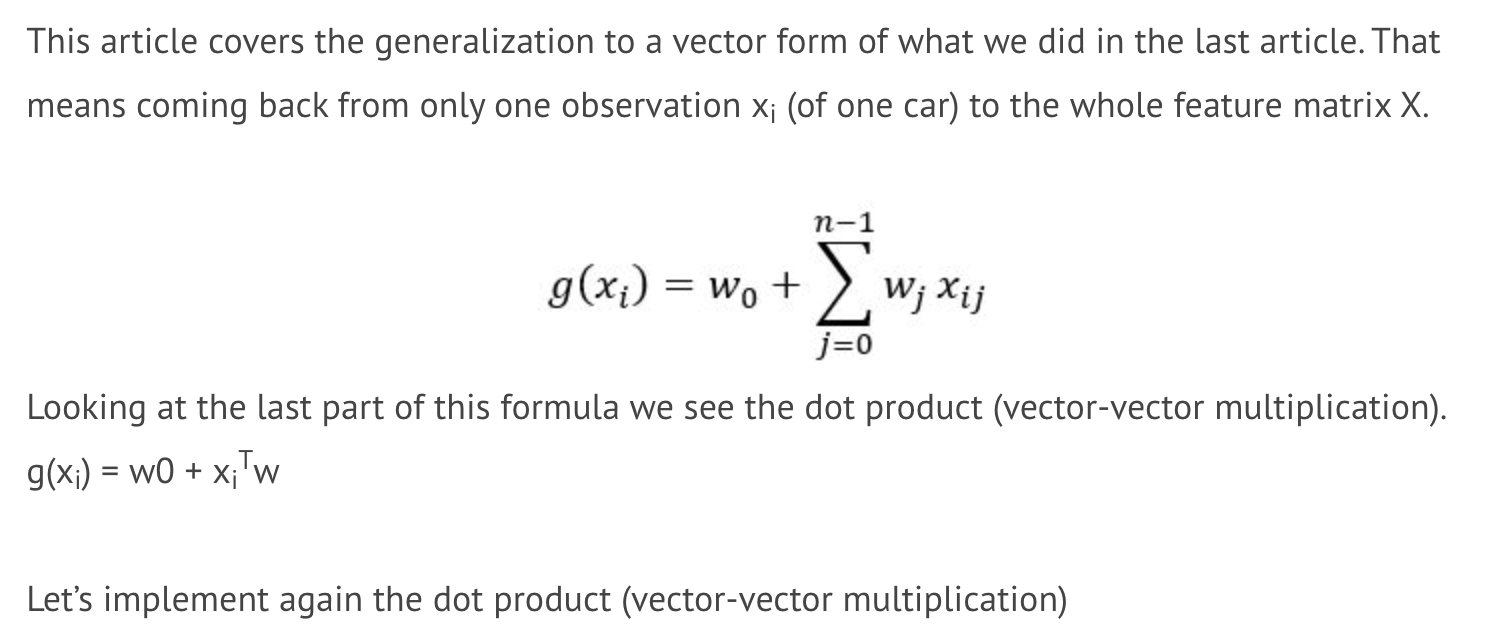

In [39]:
def dot(xi, w):
    n = len(xi)
     
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
         
    return res

In [40]:
def linear_regression(xi):
    return w0 + dot(xi, w) 

In [41]:
xi = [138, 24, 1385]
w0 = 7.17
w = [0.01, 0.04, 0.002]
 
# adding w0 to the vector w
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [42]:
xi

[138, 24, 1385]

In [43]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
 
linear_regression(xi)

12.280000000000001

In [44]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
 
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
 
# X becomes a list of lists
X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [47]:
# This turns the list of lists into a matrix
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [48]:
# Now we have predictions, so for each car we have a price for this car
y = X.dot(w_new)
 
# shortcut to not do -1 manually to get the real $ price
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

In [49]:
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

## Training a linear regression model
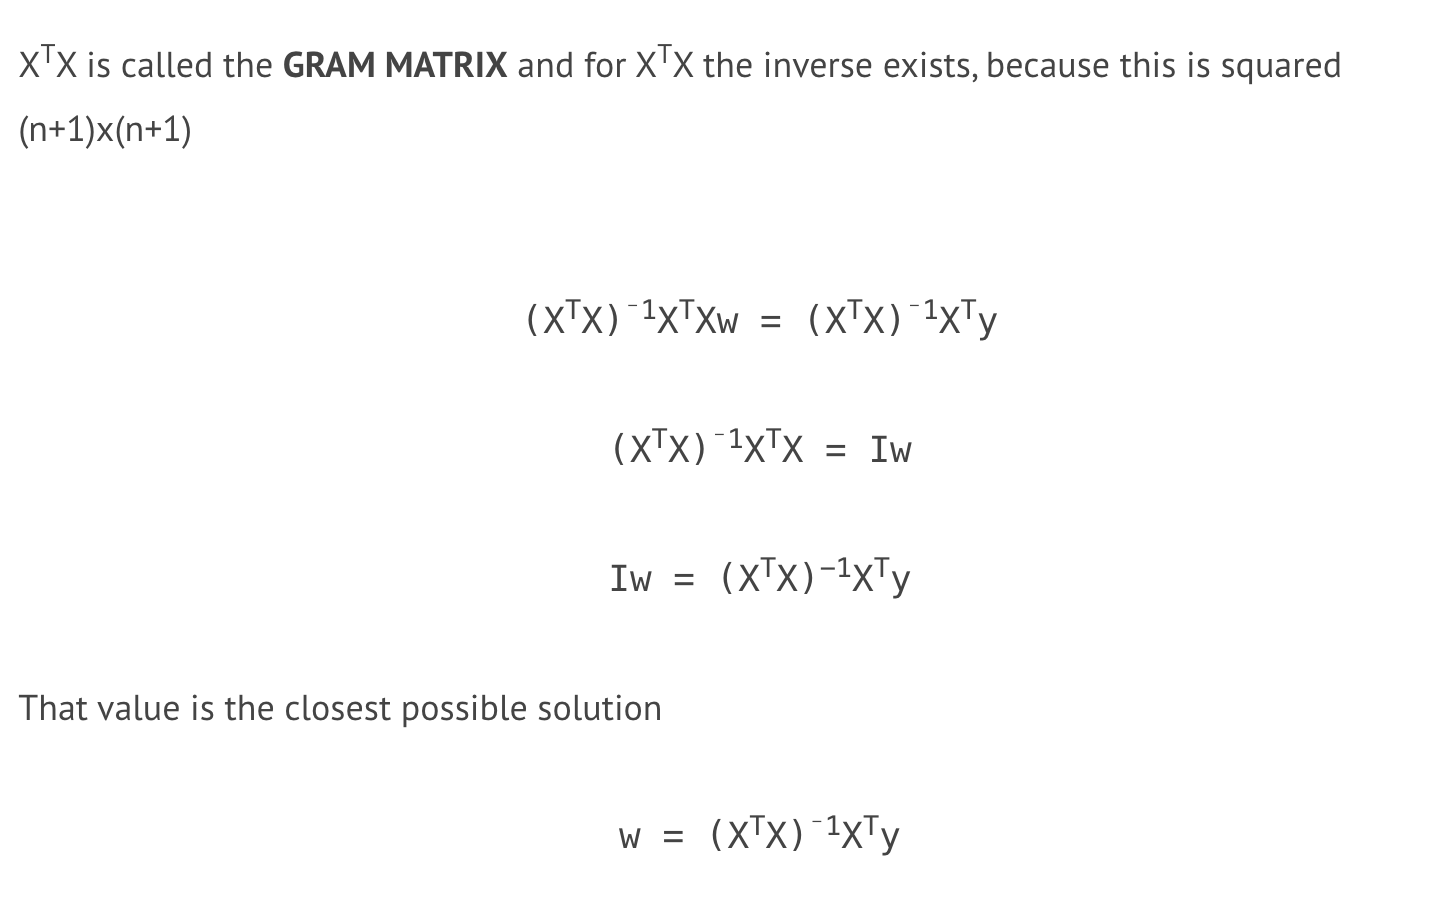

In [50]:
def train_linear_regression(X, y):
    pass

In [51]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

From the last article we know that we need to add a new column with ones to the feature matrix X. That is for the multiplication with w0. We remember that we can use np.ones() to get a vector with ones at each position.

In [52]:
ones = np.ones(9)
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [53]:
# X.shape[0] looks at the number of rows and creates the vector of ones
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now we need to stack this vector of ones with our feature matrix X. For this we can use the NumPy function np.column_stack() as shown in the next snippet.

In [54]:
np.column_stack([ones, ones])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [55]:
X = np.column_stack([ones, X])
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
# GRAM MATRIX
XTX = X.T.dot(X)
 
# Inverse GRAM MATRIX
XTX_inv = np.linalg.inv(XTX)

In [57]:
# Without round(1) it's not exactly identity matrix but the other values 
# are very close to 0 --> we can treat them as 0 and take it as identity matrix
XTX.dot(XTX_inv)

array([[ 1.00000000e+00,  3.27949981e-18,  6.10659933e-17,
        -2.33198758e-19],
       [ 1.07148990e-13,  1.00000000e+00,  1.36992654e-14,
        -1.66268809e-16],
       [-5.87553010e-14, -3.38516717e-18,  1.00000000e+00,
        -3.53180975e-18],
       [ 8.53157931e-13,  1.27770706e-15, -1.04366504e-14,
         1.00000000e+00]])

In [58]:
# This gives us the I matrix
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0., -0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [59]:
# w_full contains all the weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])

In [60]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(30009.252922766627),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

In [61]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [62]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
train_linear_regression(X, y)

(np.float64(30009.252922766627),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

## Car price baseline model

In [63]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [64]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [65]:
# We choose the columns engine_hp, engine_cylinders, highway_mpg, city_mpg, and popularity for our base model.
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
 
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,241.0,4.0,31,23,617
1,201.0,6.0,28,20,1385
2,205.0,6.0,19,15,2202
3,NaN,0.0,106,95,1391
4,225.0,8.0,17,12,1851


In [66]:
X_train = df_train[base].values
X_train

array([[ 241.,    4.,   31.,   23.,  617.],
       [ 201.,    6.,   28.,   20., 1385.],
       [ 205.,    6.,   19.,   15., 2202.],
       ...,
       [ 317.,    8.,   17.,   12., 2009.],
       [ 317.,    8.,   19.,   13., 2009.],
       [ 266.,    6.,   25.,   18., 2031.]], shape=(7150, 5))

In [68]:
df_train[base].isnull().sum()
# Missing values are generally not good for our model. Therefore, you should always check whether such values are present.

engine_hp           37
engine_cylinders    20
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

As you can see there are two columns that have missing values. The easiest thing we can do is fill them with zeros. But notice filling it with 0 makes the model ignore this feature, because:

g(xi) = w0 + xi1w1 + xi2w2

if xi1 = 0 then the last equation simplifies to

g(xi) = w0 + 0 + xi2w2

But 0 is not always the best way to deal with missing values, because that means there is an observation of a car with 0 cylinders or 0 horse powers. And a car without cylinders or 0 horse powers does not make much sense at this point. For the current example this procedure is sufficient for us.

In [69]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [70]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 241.,    4.,   31.,   23.,  617.],
       [ 201.,    6.,   28.,   20., 1385.],
       [ 205.,    6.,   19.,   15., 2202.],
       ...,
       [ 317.,    8.,   17.,   12., 2009.],
       [ 317.,    8.,   19.,   13., 2009.],
       [ 266.,    6.,   25.,   18., 2031.]], shape=(7150, 5))

In [71]:
y_train

array([10.83763785,  9.88154865, 10.21467861, ..., 10.51436663,
       10.81739545, 10.53624758], shape=(7150,))

In [72]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.460161056125304),
 array([ 9.24049674e-03, -1.15872377e-01,  4.66629670e-02, -1.13764778e-02,
        -4.72960062e-06]))

In [73]:
y_pred = w0 + X_train.dot(w)
y_pred

array([10.40560609,  9.69474966,  9.36476325, ..., 10.10967045,
       10.1916199 , 10.17509069], shape=(7150,))

<Axes: ylabel='Count'>

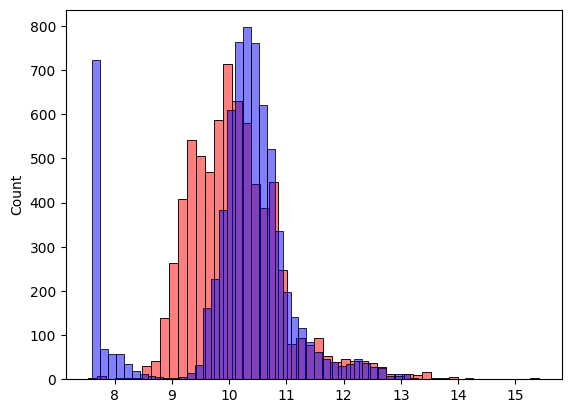

In [74]:
# alpha changes the transparency of the bars
# bins specifies the number of bars
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)